팬시 인덱싱: 단일 스칼라 대신 인덱스 배열을 전달하는 것

In [1]:
import numpy as np

In [2]:
rng = np.random.RandomState(42)
a = rng.randint(100, size=100)
a

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74, 87, 99, 23,  2, 21, 52,  1,
       87, 29, 37,  1, 63, 59, 20, 32, 75, 57, 21, 88, 48, 90, 58, 41, 91,
       59, 79, 14, 61, 61, 46, 61, 50, 54, 63,  2, 50,  6, 20, 72, 38, 17,
        3, 88, 59, 13,  8, 89, 52,  1, 83, 91, 59, 70, 43,  7, 46, 34, 77,
       80, 35, 49,  3,  1,  5, 53,  3, 53, 92, 62, 17, 89, 43, 33, 73, 61,
       99, 13, 94, 47, 14, 71, 77, 86, 61, 39, 84, 79, 81, 52, 23])

In [3]:
idx = [3, 7, 4]

In [4]:
a[idx]

array([71, 86, 60])

# 팬시 인덱싱을 이용하면 결과의 형상이 인덱스 배열의 형상을 반영한다.

In [5]:
idx = np.array([[3, 6], [4,3]])
a[idx]

array([[71, 82],
       [60, 71]])

In [6]:
X = np.arange(12).reshape(3,4)
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [7]:
row = np.array([0,1,2])
col = np.array([2,1,3])
X[row, col]

array([ 2,  5, 11])

In [8]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [57]:
x = np.zeros(10)
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [58]:
x[[0, 0]] = [4, 6]
x

array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [59]:
i = [2,3,3,4,4]

In [61]:
# x[i] += 1은 x[i] + 1이 평가가 된 후에 x[i]에 할당되므로 증가가 일어나지 않는다.
x[i] += 1
x

array([6., 0., 2., 2., 2., 0., 0., 0., 0., 0.])

# `np.add.at(x, index, value)`
: x[index]에 value를 더함

In [63]:
x = np.zeros(10)
np.add.at(x, i, 1)
x

array([0., 0., 1., 2., 2., 0., 0., 0., 0., 0.])

In [65]:
np.add.reduce(x)

5.0

In [66]:
np.add.accumulate(x)

array([0., 0., 1., 3., 5., 5., 5., 5., 5., 5.])

# `ufuncs.reduceat(x, indices)`
: indices의 값으로 슬라이스 구간에 대해서 ufuncs 적용
https://numpy.org/doc/stable/reference/generated/numpy.ufunc.reduceat.html

In [206]:
x = np.random.randint(10, size=5)
x

array([7, 7, 2, 3, 4])

In [207]:
i = np.random.randint(5, size=4)
i

array([1, 3, 1, 3])

In [208]:
np.add.reduceat(x, i)

array([9, 3, 9, 7])

# 데이터 구간화

In [210]:
rng = np.random.default_rng(42)
rng

Generator(PCG64) at 0x7F642234C5F0

In [211]:
x = np.random.randn(100)

In [212]:
bins = np.linspace(-5, 5, 20)

In [213]:
counts = np.zeros_like(bins)

In [214]:
i = np.searchsorted(bins, x) # x가 bins에 어느 구간에 포함되는지 찾기

In [215]:
np.add.at(counts, i, 1)

In [216]:
import matplotlib.pyplot as plt

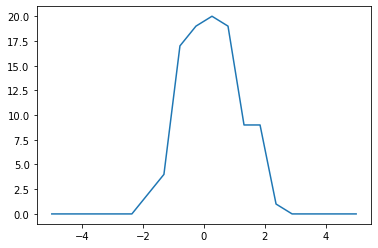

In [217]:
plt.plot(bins, counts)

(array([ 0.,  0.,  0.,  0.,  0.,  2.,  4., 17., 19., 20., 19.,  9.,  9.,
         1.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 [<matplotlib.patches.Polygon at 0x7f6421e339d0>])

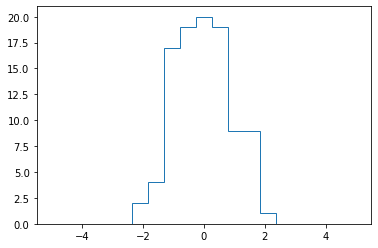

In [218]:
plt.hist(x, bins, histtype='step')